# common

only unweighted

In [1]:
import networkx as nx
import numpy as np
from spenet import slq_spenet, ste_spenet, exact_spenet
from utils import load_graph, rodger_graphs, weighted_graphs, unweighted_graphs, relative_error
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
step = 10
nv = 100
avg = 10

# k

In [3]:
ks = [2., 2.5, 3., 3.5, 4.,4.5, 5., 5.5,6.]

In [4]:
def add_relative_error(df, G, now_id):
    gtypes = ["normalized_laplacian", "laplacian"]
    for gtype in gtypes:
        if gtype == "normalized_laplacian":
            M = nx.normalized_laplacian_matrix(G)
        elif gtype == "laplacian":
            M = nx.laplacian_matrix(G)
        elif gtype == "adjacency":
            M = nx.adjacency_matrix(G)
        for k in ks:
            errors = []
            exact = exact_spenet(M, k, method="eig")
            for seed in range(avg):
                #ste = ste_spenet(M, k, nv=nv, seed=seed)
                slq = slq_spenet(M, k, step=step, nv=nv, seed=seed)
                errors.append(relative_error(slq, exact))
            errors = np.array(errors)    
            df = df.append({"id":now_id, "relative_error":errors.mean(), "k":k, "matrix":gtype},ignore_index=True)
    return df

df = pd.DataFrame(columns=["id", "relative_error", "k", "matrix"])

now_id = 0
# unweighted_graphs
is_weighted = False
for path in unweighted_graphs:
    G = load_graph(path, is_weighted)
    n = G.number_of_nodes()
    m = G.number_of_edges()
    print(f"now_id:{now_id}, path:{path}, n:{n}, m:{m}")
    df = add_relative_error(df, G, now_id)
    now_id += 1


# weighted_graphs
is_weighted = True
for path in weighted_graphs:
    G = load_graph(path, is_weighted)
    n = G.number_of_nodes()
    m = G.number_of_edges()
    print(f"now_id:{now_id}, path:{path}, n:{n}, m:{m}")
    df = add_relative_error(df, G, now_id)
    now_id += 1




path:data/networkrepository/bio/bio-celegans/bio-celegans.mtx, n:453, m:2025
path:data/networkrepository/bio/bio-celegans-dir/bio-celegans-dir.edges, n:453, m:2040
path:data/networkrepository/bio/bio-diseasome/bio-diseasome.mtx, n:516, m:1188
path:data/networkrepository/cheminformatics/ENZYMES_g295/ENZYMES_g295.edges, n:123, m:139
path:data/networkrepository/cheminformatics/ENZYMES_g296/ENZYMES_g296.edges, n:125, m:141
path:data/networkrepository/cheminformatics/ENZYMES_g297/ENZYMES_g297.edges, n:121, m:149
path:data/networkrepository/interaction/ia-crime-moreno/ia-crime-moreno.edges, n:829, m:1475
path:data/networkrepository/interaction/ia-email-univ/ia-email-univ.mtx, n:1133, m:5451
path:data/networkrepository/interaction/ia-enron-only/ia-enron-only.mtx, n:143, m:623
path:data/networkrepository/interaction/ia-fb-messages/ia-fb-messages.mtx, n:1266, m:6451
path:data/networkrepository/interaction/ia-infect-dublin/ia-infect-dublin.mtx, n:410, m:2765
path:data/networkrepository/interacti

/Users/murakaminaoki/git/research/SPENet/spenet.py:52: RuntimeWarning: invalid value encountered in power
  return lambda x: np.power(x, k)


path:data/networkrepository/miscellaneous/GD96_b/GD96_b.mtx, n:111, m:193
path:data/networkrepository/miscellaneous/GD98_b/GD98_b.mtx, n:121, m:132
path:data/networkrepository/miscellaneous/GD98_c/GD98_c.mtx, n:112, m:168
path:data/networkrepository/miscellaneous/GD99_c/GD99_c.mtx, n:105, m:120
path:data/networkrepository/miscellaneous/gent113/gent113.mtx, n:113, m:639
path:data/networkrepository/bio/bio-CE-GT/bio-CE-GT.edges, n:924, m:3239
path:data/networkrepository/bio/bio-CE-LC/bio-CE-LC.edges, n:1387, m:1648
path:data/networkrepository/bio/bio-DM-LC/bio-DM-LC.edges, n:658, m:1129
path:data/networkrepository/bio/bio-SC-TS/bio-SC-TS.edges, n:636, m:3959
path:data/networkrepository/miscellaneous/eco-florida/eco-florida.edges, n:128, m:2075
path:data/networkrepository/miscellaneous/eco-foodweb-baydry/eco-foodweb-baydry.edges, n:128, m:2106
path:data/networkrepository/miscellaneous/gre_115/gre_115.mtx, n:115, m:382
path:data/networkrepository/miscellaneous/gre_185/gre_185.mtx, n:185, m

In [7]:
df.groupby(["matrix", "k"]).mean()

relative_error
matrix               k                  
laplacian            2.0        0.018214
                     2.5        0.022770
                     3.0        0.028514
                     3.5        0.032560
                     4.0        0.037249
                     4.5        0.040586
                     5.0        0.044194
                     5.5        0.046842
                     6.0        0.049671
normalized_laplacian 2.0        0.006690
                     2.5        0.008115
                     3.0        0.009681
                     3.5        0.011026
                     4.0        0.012741
                     4.5        0.013932
                     5.0        0.015799
                     5.5        0.016835
                     6.0        0.018933

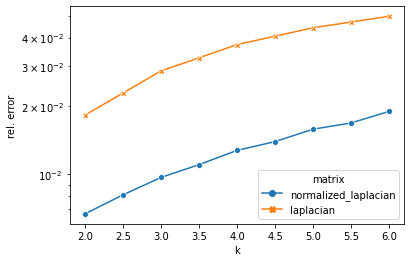

In [14]:
ax = sns.lineplot(
    data=df.groupby(["matrix", "k"]).mean().sort_values("matrix",ascending=False),
    x="k", y="relative_error", hue="matrix", style="matrix",
    markers=True, dashes=False
)
ax.set(xlabel="k",ylabel="rel. error", yscale="log") #
plt.savefig(f'plot/plot_param_k.png')
plt.show()

# step

In [30]:
steps = [2, 3, 4, 5, 10, 20, 40]
k = 4.5
nv = 100
avg = 10

In [31]:
def add_relative_error(df, G, now_id):
    gtypes = ["normalized_laplacian", "laplacian"]
    for gtype in gtypes:
        if gtype == "normalized_laplacian":
            M = nx.normalized_laplacian_matrix(G)
        elif gtype == "laplacian":
            M = nx.laplacian_matrix(G)
        elif gtype == "adjacency":
            M = nx.adjacency_matrix(G)
        exact = exact_spenet(M, k, method="eig")
        for step in steps:
            errors = []
            for seed in range(avg):
                #ste = ste_spenet(M, k, nv=nv, seed=seed)
                slq = slq_spenet(M, k, step=step, nv=nv, seed=seed)
                errors.append(relative_error(slq, exact))
            errors = np.array(errors)    
            df = df.append({"id":now_id, "relative_error":errors.mean(), "step":step, "matrix":gtype},ignore_index=True)
    return df

df = pd.DataFrame(columns=["id", "relative_error", "step", "matrix"])

now_id = 0
# unweighted_graphs
is_weighted = False
for path in unweighted_graphs:
    G = load_graph(path, is_weighted)
    n = G.number_of_nodes()
    m = G.number_of_edges()
    print(f"now_id:{now_id}, path:{path}, n:{n}, m:{m}")
    df = add_relative_error(df, G, now_id)
    now_id += 1


# weighted_graphs
is_weighted = True
for path in weighted_graphs:
    G = load_graph(path, is_weighted)
    n = G.number_of_nodes()
    m = G.number_of_edges()
    print(f"now_id:{now_id}, path:{path}, n:{n}, m:{m}")
    df = add_relative_error(df, G, now_id)
    now_id += 1


now_id:0, path:data/networkrepository/bio/bio-celegans/bio-celegans.mtx, n:453, m:2025


/Users/murakaminaoki/git/research/SPENet/spenet.py:52: RuntimeWarning: invalid value encountered in power
  return lambda x: np.power(x, k)


now_id:1, path:data/networkrepository/bio/bio-celegans-dir/bio-celegans-dir.edges, n:453, m:2040
now_id:2, path:data/networkrepository/bio/bio-diseasome/bio-diseasome.mtx, n:516, m:1188
now_id:3, path:data/networkrepository/cheminformatics/ENZYMES_g295/ENZYMES_g295.edges, n:123, m:139
now_id:4, path:data/networkrepository/cheminformatics/ENZYMES_g296/ENZYMES_g296.edges, n:125, m:141
now_id:5, path:data/networkrepository/cheminformatics/ENZYMES_g297/ENZYMES_g297.edges, n:121, m:149
now_id:6, path:data/networkrepository/interaction/ia-crime-moreno/ia-crime-moreno.edges, n:829, m:1475
now_id:7, path:data/networkrepository/interaction/ia-email-univ/ia-email-univ.mtx, n:1133, m:5451
now_id:8, path:data/networkrepository/interaction/ia-enron-only/ia-enron-only.mtx, n:143, m:623
now_id:9, path:data/networkrepository/interaction/ia-fb-messages/ia-fb-messages.mtx, n:1266, m:6451
now_id:10, path:data/networkrepository/interaction/ia-infect-dublin/ia-infect-dublin.mtx, n:410, m:2765
now_id:11, pa

In [32]:
df.groupby(["matrix", "step"]).mean()

relative_error
matrix               step                
laplacian            2           0.147402
                     3           0.040970
                     4           0.040945
                     5           0.040944
                     10          0.040586
                     20          0.041861
                     40          0.049348
normalized_laplacian 2           0.047573
                     3           0.014274
                     4           0.014269
                     5           0.013932
                     10          0.013932
                     20          0.014413
                     40          0.018994

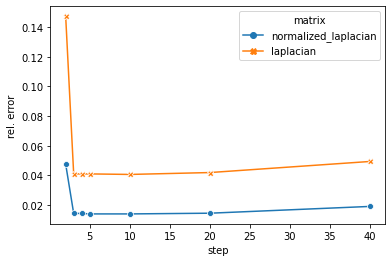

In [33]:
ax = sns.lineplot(
    data=df.groupby(["matrix", "step"]).mean().sort_values("matrix",ascending=False),
    x="step", y="relative_error", hue="matrix", style="matrix",
    markers=True, dashes=False
)
ax.set(xlabel="step",ylabel="rel. error") #
plt.savefig(f'plot/plot_param_s.png')
plt.show()

# nv

In [36]:
nvs = [5, 10, 20, 40, 80, 160, 320]
step = 10
k = 4
nv = 100
avg = 10

In [37]:
def add_relative_error(df, G, now_id):
    gtypes = ["normalized_laplacian", "laplacian", "adjacency"]
    for gtype in gtypes:
        if gtype == "normalized_laplacian":
            M = nx.normalized_laplacian_matrix(G)
        elif gtype == "laplacian":
            M = nx.laplacian_matrix(G)
        elif gtype == "adjacency":
            M = nx.adjacency_matrix(G)
        for nv in nvs:
            errors = []
            exact = exact_spenet(M, k, method="prod")
            for seed in range(avg):
                #ste = ste_spenet(M, k, nv=nv, seed=seed)
                slq = slq_spenet(M, k, step=step, nv=nv, seed=seed)
                errors.append(relative_error(slq, exact))
            errors = np.array(errors)    
            df = df.append({"id":now_id, "relative_error":errors.mean(), "nv":nv, "matrix":gtype},ignore_index=True)
    return df

df = pd.DataFrame(columns=["id", "relative_error", "nv", "matrix"])

now_id = 0
# unweighted_graphs
is_weighted = False
for path in unweighted_graphs:
    G = load_graph(path, is_weighted)
    n = G.number_of_nodes()
    m = G.number_of_edges()
    print(f"now_id:{now_id}, path:{path}, n:{n}, m:{m}")
    df = add_relative_error(df, G, now_id)
    now_id += 1


# weighted_graphs
is_weighted = True
for path in weighted_graphs:
    G = load_graph(path, is_weighted)
    n = G.number_of_nodes()
    m = G.number_of_edges()
    print(f"now_id:{now_id}, path:{path}, n:{n}, m:{m}")
    df = add_relative_error(df, G, now_id)
    now_id += 1

now_id:0, path:data/networkrepository/bio/bio-celegans/bio-celegans.mtx, n:453, m:2025
now_id:1, path:data/networkrepository/bio/bio-celegans-dir/bio-celegans-dir.edges, n:453, m:2040
now_id:2, path:data/networkrepository/bio/bio-diseasome/bio-diseasome.mtx, n:516, m:1188
now_id:3, path:data/networkrepository/cheminformatics/ENZYMES_g295/ENZYMES_g295.edges, n:123, m:139
now_id:4, path:data/networkrepository/cheminformatics/ENZYMES_g296/ENZYMES_g296.edges, n:125, m:141
now_id:5, path:data/networkrepository/cheminformatics/ENZYMES_g297/ENZYMES_g297.edges, n:121, m:149
now_id:6, path:data/networkrepository/interaction/ia-crime-moreno/ia-crime-moreno.edges, n:829, m:1475
now_id:7, path:data/networkrepository/interaction/ia-email-univ/ia-email-univ.mtx, n:1133, m:5451
now_id:8, path:data/networkrepository/interaction/ia-enron-only/ia-enron-only.mtx, n:143, m:623
now_id:9, path:data/networkrepository/interaction/ia-fb-messages/ia-fb-messages.mtx, n:1266, m:6451
now_id:10, path:data/networkre

In [38]:
df.groupby(["matrix", "nv"]).mean()

relative_error
matrix               nv                 
adjacency            5          0.186583
                     10         0.146599
                     20         0.104489
                     40         0.081940
                     80         0.062845
                     160        0.038384
                     320        0.027467
laplacian            5          0.156915
                     10         0.123808
                     20         0.086985
                     40         0.058126
                     80         0.040350
                     160        0.028823
                     320        0.021557
normalized_laplacian 5          0.062614
                     10         0.039162
                     20         0.025350
                     40         0.019049
                     80         0.013373
                     160        0.008751
                     320        0.006808

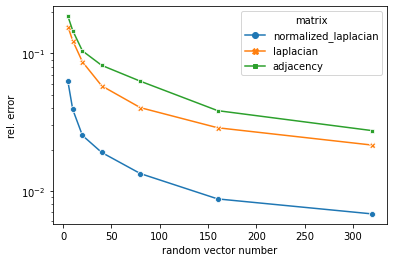

In [42]:
ax = sns.lineplot(
    data=df.groupby(["matrix", "nv"]).mean().sort_values("matrix",ascending=False),
    x="nv", y="relative_error", hue="matrix", style="matrix",
    markers=True, dashes=False
)
ax.set(xlabel="random vector number",ylabel="rel. error", yscale="log") #
plt.savefig(f'plot/plot_param_nv.png')
plt.show()